# Bank Customers Clustering Analysis

## Import libraries

In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta

 ## Load data

In [4]:
dataset = pd.read_csv(r'bank_transactions.csv')
dataset.head(n = 5)
#print(dataset)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Data cleaning

In [5]:
print(dataset['TransactionID'].unique())
print(dataset['TransactionID'].unique().size)
print(dataset['CustomerID'].unique())
print(dataset['CustomerID'].unique().size)

rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
1048567
['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
884265
Number of Rows:  1048567
Number of Columns:  9


In [6]:
all_types = dataset.dtypes
print(all_types)
print("-------------------------------")
print(dataset.isnull().sum())

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object
-------------------------------
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [7]:
#Removing the T in the "TransactionID" field to get a column with unique integer values to use as dataframe indexes

print(dataset['TransactionID'].is_unique) #True, so we use this field as index 
dataset['TransactionID'] = dataset['TransactionID'].replace({'T' : ''}, regex=True)
dataset['TransactionID'] = dataset['TransactionID'].astype(int)

dataset = dataset.set_index('TransactionID')

True


In [8]:
#dataset.drop('TransactionID', inplace=True, axis=1) #used default indexes
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
TransactionID,,,,,,,,
1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [9]:
print(dataset['CustLocation'].unique())
print(dataset['CustLocation'].unique().size)

['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
9356


In [10]:
dataset = dataset.dropna(subset = ['CustomerDOB','CustGender', 'CustLocation', 'CustAccountBalance'], how = 'any', inplace=False)
#print(dataset) # 1048567-6953 rows -> 1041614 rows

print("-------------------------------")
print(dataset.isnull().sum())  #check that there are no more null values

-------------------------------
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [11]:
#count values in the column 'CustomerDOB'. There is a default date of birth when the real age is missing (1/1/1800).
print(dataset['CustomerDOB'].value_counts())

#we remove rows which contain this value
dataset = dataset.drop(dataset[dataset['CustomerDOB'] == '1/1/1800'].index,axis = 0)  

rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: ", rows) #985322 rows now
print("Number of Columns: ", cols)

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64
Number of Rows:  985322
Number of Columns:  8


In [12]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate']) #convert to datetime
dataset['CustomerDOB'] = pd.to_datetime(dataset['CustomerDOB']) #convert to datetime
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
TransactionID,,,,,,,,
1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [13]:
print(dataset[dataset['TransactionDate'].dt.year!=2016]) #to verify that all transactions were made in 2016

Empty DataFrame
Columns: [CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
Index: []


In [14]:
#To solve ambiguity on dataset['CustomerDOB']
#remove 100 years where date is greater than date of the transaction
dataset['CustomerDOB'].mask(dataset['CustomerDOB'].dt.year >= dataset['TransactionDate'].dt.year, dataset['CustomerDOB'] - pd.DateOffset(years = 100) , inplace=True )

#remove 100 years if the person is less than 10 years old
dataset['CustomerDOB'].mask(dataset['TransactionDate'].dt.year - dataset['CustomerDOB'].dt.year < 10 , dataset['CustomerDOB'] - pd.DateOffset(years = 100) , inplace=True )


#create a CustomerAGE column in the dataset
dataset['CustomerAGE'] = dataset['TransactionDate']- dataset['CustomerDOB']
print(dataset['CustomerAGE'].dtype) #timedelta64[ns]

#to get only the year (as an integer number)
dataset['CustomerAGE'] = dataset['CustomerAGE'].astype('timedelta64[Y]').astype('int')
dataset.head()


timedelta64[ns]


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
TransactionID,,,,,,,,,
1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,21
2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,58
3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,19
4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,42
5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,27


In [15]:
filtered_data = dataset[(dataset['CustomerAGE'] < 16)] #to see how many people between 16 and 10 years are left (2000-2006)
print(filtered_data) #550 rows

#we consider that this is the real age because it is unlikely that they are more than 110 years old

              CustomerID CustomerDOB CustGender CustLocation  \
TransactionID                                                  
486             C8013820  2004-12-07          F      CHENNAI   
3697            C1934386  2002-09-12          M    NEW DELHI   
5921            C7424249  2001-04-03          M    BANGALORE   
6715            C7828452  2002-08-20          M     AMRITSAR   
6967            C1911373  2000-11-04          M          PEN   
...                  ...         ...        ...          ...   
1044339         C6822618  2001-11-07          F        PATNA   
1045059         C3422655  2001-11-07          F        PATNA   
1045120         C8943140  2002-07-17          F         AGRA   
1045630         C8010686  2005-08-15          F      GURGAON   
1046677         C2722682  2001-11-07          F        PATNA   

               CustAccountBalance TransactionDate  TransactionTime  \
TransactionID                                                        
486                       6

In [16]:
#to get hour/min/sec of the transaction
dataset['TransactionTime'] = dataset['TransactionTime'].apply(lambda x : datetime.datetime.fromtimestamp(int(x)).strftime('%H:%M:%S'))

In [17]:
all_types = dataset.dtypes
print(all_types) 
dataset.head()

CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                    object
TransactionAmount (INR)           float64
CustomerAGE                         int32
dtype: object


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
TransactionID,,,,,,,,,
1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21
2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58
3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19
4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42
5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27


In [18]:
print(dataset[dataset['CustAccountBalance'] < dataset ['TransactionAmount (INR)']])

              CustomerID CustomerDOB CustGender CustLocation  \
TransactionID                                                  
2               C2142763  1957-04-04          M      JHAJJAR   
27              C5430368  1986-01-02          M        DELHI   
35              C7017047  1977-04-23          M      GURGAON   
37              C4320949  1984-10-25          F      CHENNAI   
47              C8934588  1981-10-23          M       JAIPUR   
...                  ...         ...        ...          ...   
1048538         C9016563  1987-12-27          M    SHILLLONG   
1048539         C3319123  1979-07-06          M        DELHI   
1048543         C6210667  1989-10-09          M        MALDA   
1048561         C5028150  1980-05-24          M         PUNE   
1048562         C1034220  1992-11-19          M    BANGALORE   

               CustAccountBalance TransactionDate TransactionTime  \
TransactionID                                                       
2                         227

In [19]:
print(dataset.loc[42727])           

CustomerID                            C2638824
CustomerDOB                1987-08-01 00:00:00
CustGender                                   M
CustLocation                        CHANDIGARH
CustAccountBalance                    53524.95
TransactionDate            2016-03-08 00:00:00
TransactionTime                       01:00:01
TransactionAmount (INR)                 1926.0
CustomerAGE                                 28
Name: 42727, dtype: object


In [20]:
#dataset.to_csv('bank_transactions_pre_processed.csv')

## Data visualizations

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

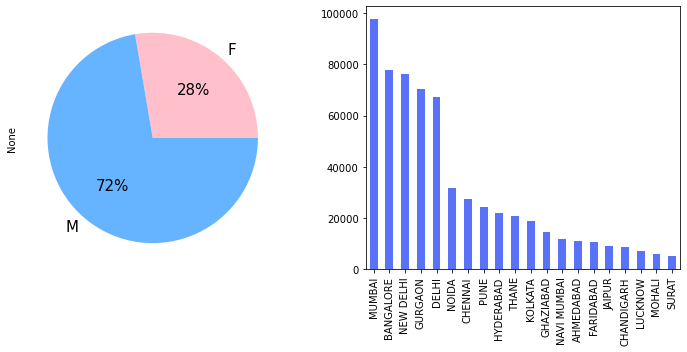

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

colors = ['#ffc0cb','#66b3ff']
dataset.groupby('CustGender').size().plot(kind='pie', colors = colors, autopct='%1.0f%%', textprops={'fontsize': 15}, ax=ax1)
dataset['CustLocation'].value_counts()[:20].plot(kind='bar', ax=ax2, color=['#5a72fa']) #first 20 locations with the highest number of transactions

plt.tight_layout()
plt.show()

In [23]:
dataset.describe()

,CustAccountBalance,TransactionAmount (INR),CustomerAGE
count,9.853220e+05,9.853220e+05,985322.000000
mean,1.060612e+05,1.452425e+03,30.623654
std,8.179054e+05,6.139765e+03,8.824110
min,0.000000e+00,0.000000e+00,9.000000
25%,4.582132e+03,1.510000e+02,25.000000
50%,1.600630e+04,4.310000e+02,28.000000
75%,5.375908e+04,1.125000e+03,34.000000
max,1.150355e+08,1.560035e+06,109.000000


30.623653993313862


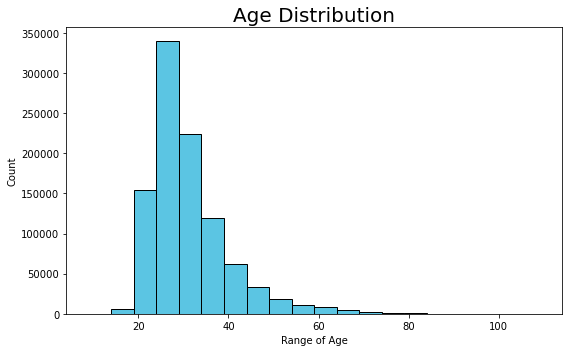

In [24]:
plt.figure(figsize=(8,5))


print(dataset["CustomerAGE"].mean())

dataset['CustomerAGE'].plot(kind='hist', bins= 20 , edgecolor='black',  color=['#5bc5e3'])

plt.title('Age Distribution', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [25]:
dataset["CustGender"] = dataset["CustGender"].apply(lambda x: 1 if x == "F" else 0) #to get numeric values from CustGender column
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
TransactionID,,,,,,,,,
1,C5841053,1994-10-01,1,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21
2,C2142763,1957-04-04,0,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58
3,C4417068,1996-11-26,1,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19
4,C5342380,1973-09-14,1,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42
5,C9031234,1988-03-24,1,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27


30.623653993313862
30.623653993313862


<Figure size 720x576 with 0 Axes>

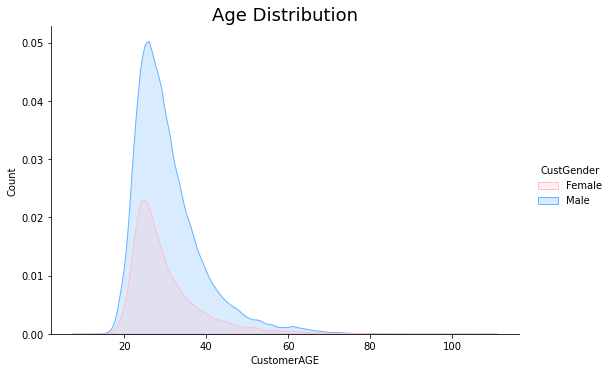

In [26]:
print(dataset["CustomerAGE"].mean())
plt.figure(figsize=(10,8))
labeled_data = dataset.copy()
labeled_data["CustGender"].replace({0:"Male", 1:"Female"}, inplace=True)

sns.displot(data=labeled_data, x='CustomerAGE', hue='CustGender', kind='kde', fill = True, palette=['#ffc0cb','#66b3ff'], height=5, aspect=1.5)
print(dataset["CustomerAGE"].mean())
plt.title('Age Distribution', fontsize = 18)
#plt.xlabel('Range of Age')
plt.ylabel('Count')

#plt.tight_layout()
plt.show()

In [27]:
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
TransactionID,,,,,,,,,
1,C5841053,1994-10-01,1,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21
2,C2142763,1957-04-04,0,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58
3,C4417068,1996-11-26,1,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19
4,C5342380,1973-09-14,1,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42
5,C9031234,1988-03-24,1,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27


<Figure size 720x576 with 0 Axes>

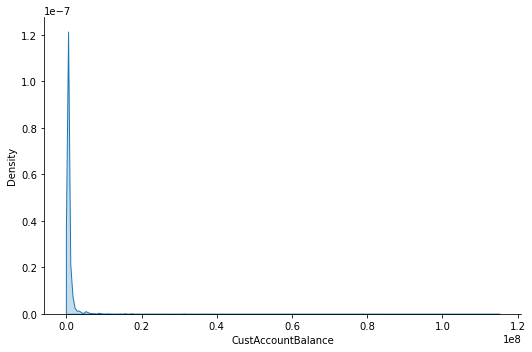

In [28]:
plt.figure(figsize=(10,8))


#dataset['CustomerAGE'].plot(kind='hist', bins= 20 , edgecolor='black',  color=['#5bc5e3'])
sns.displot(data=labeled_data, x='CustAccountBalance', kind='kde', fill = True, palette='#25c24f', height=5, aspect=1.5)

#sns.displot(dataset, x = 'CustomerAGE')
#plt.title('CustAccountBalance Distribution', fontsize = 18)
#plt.xlabel('Range of Age')
#plt.ylabel('Count')

#plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

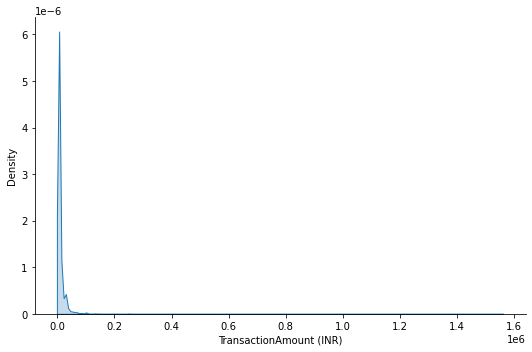

In [29]:
plt.figure(figsize=(10,8))


#dataset['CustomerAGE'].plot(kind='hist', bins= 20 , edgecolor='black',  color=['#5bc5e3'])
sns.displot(data=labeled_data, x='TransactionAmount (INR)', kind='kde', fill = True, palette='#25c24f', height=5, aspect=1.5)

#sns.displot(dataset, x = 'CustomerAGE')
#plt.title('TransactionAmount Distribution', fontsize = 18)
#plt.xlabel('Range of Age')
#plt.ylabel('Count')

#plt.tight_layout()
plt.show()

In [30]:
dataset['Month']= dataset['TransactionDate'].dt.month
dataset['Month'] = pd.to_numeric(dataset['Month'])

In [31]:
dataset['Hour'] = dataset['TransactionTime'].astype(str).str[:2]
dataset['Hour'] = pd.to_numeric(dataset['Hour'])
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE,Month,Hour
TransactionID,,,,,,,,,,,
1,C5841053,1994-10-01,1,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21,2,16
2,C2142763,1957-04-04,0,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58,2,16
3,C4417068,1996-11-26,1,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19,2,16
4,C5342380,1973-09-14,1,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42,2,16
5,C9031234,1988-03-24,1,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27,2,3


In [32]:
dataset_clustering = dataset[dataset['Month'] == 1]

In [33]:
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE,Month,Hour
TransactionID,,,,,,,,,,,
1,C5841053,1994-10-01,1,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21,2,16
2,C2142763,1957-04-04,0,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58,2,16
3,C4417068,1996-11-26,1,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19,2,16
4,C5342380,1973-09-14,1,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42,2,16
5,C9031234,1988-03-24,1,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27,2,3


In [34]:
#print(dataset_clustering) #[40232 rows x 11 columns]

In [ ]:
dataset_clustering.drop(["CustomerID","CustomerDOB","CustLocation","TransactionDate","TransactionTime", "Month", "Hour"], axis=1, inplace=True)

In [ ]:
dataset_clustering.head()

In [ ]:
plt.scatter(dataset_clustering["CustomerAGE"], dataset_clustering["TransactionAmount (INR)"])

In [ ]:
plt.scatter(dataset_clustering["CustomerAGE"], dataset_clustering["CustAccountBalance"])

In [39]:
dataset_clustering.to_csv('dataset_clustering.csv')